## 1. Loading, Cleaning, Displaying Data 

Explain your data set here; what is it about? What are the variables? What do you want to do with it? How are you going to clean it? etc. 


**Dataset Collection Origin Details :** 
This dataset has been collected from this repository "https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records" According to the information in the website, The original dataset version was collected by Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza (Government College University, Faisalabad, Pakistan) and made available by them on FigShare under the Attribution 4.0 International (CC BY 4.0: freedom to share and adapt the material) copyright in July 2017.

The current version of the dataset was elaborated by Davide Chicco (Krembil Research Institute, Toronto, Canada) and donated to the University of California Irvine Machine Learning Repository under the same Attribution 4.0 International (CC BY 4.0) copyright in January 2020. Davide Chicco can be reached at <davidechicco '@' davidechicco.it>

**The dataset is a heart failure clinical record dataset, having 13 variables and 299 observations.**

**The variables are :**

**Independent variables:**

**1. age                      : Numerical**

**2. anaemia                  : Numerical**

**3. creatinine_phosphokinase : Numerical**

**4. diabetes                 : Categorical**

**5. ejection_fraction        : Numerical**

**6. high_blood_pressure      : Categorical**

**7. platelets                : Numerical**

**8. serum_creatinine         : Numerical**

**9. serum_sodium             : Numerical**

**10. sex                     : Categorical**

**11. smoking                 : Categorical**

**12. time                    : Numerical**

**Dependent Variable

**13. DEATH_EVENT             : Categorical**


● Age: Determines the age of the person.

● Anaemia: A disorder in which one lacks sufficient healthy red blood cells to bring
enough oxygen to the tissues of the body and anemia is recurrent hearing loss
comorbidity and is associated with poor performance.

● Creatinine_phosphokinase: When the total CPK level is high, it is an enzyme in the
body that most frequently indicates that muscle tissue, heart or brain tissue has been
damaged or stressed.

● Diabetes: Metabolic condition that induces high sugar in the blood.

● Ejection_fraction: Measuring the blood percentage that leaves the heart each time it
contracts.

● High_blood_pressure: Determines if the blood pressure is high or not.

● Platelets: Determines the count of platelets in the blood.

● Serum_creatinine: Tests the creatinine level in the blood and calculates how well
the kidneys filter

● Serum_sodium : Determines the level of serum sodium in the blood

● Sex: Determines the gender whether the person is male or female.

● Smoking: Determines if a person smokes or not.

● Time: Follow up period in days

● DEATH_EVENT: If the patient died during the follow-up time

Sex - Male = 1, Female =0

Diabetes - 0 = No, 1 = Yes

Anaemia - 0 = No, 1 = Yes

High_blood_pressure - 0 = No, 1 = Yes

Smoking - 0 = No, 1 = Yes

DEATH_EVENT - 0 = No, 1 = Yes

**Here my audience are the physicians who can predict while seeing a new heart failure patient, what are the survival chances for that patient.**

**Data Carpentery**
1. Checking if any null or empty values are there and discarding those records.
2. Converting data values to categories or groups, changing column names if required to visualize and analyze data 

**Those are few ways, I am analysing the dataset, after cleaning and data carpentery is done.**

1. Exploratory data analysis, corelation plots and visualization of categorical and numeric features.
2. Perform Manova test to see whether the mean vector of creatinine_phosphokinase, ejection_fraction, platelets,serum_creatinine, serum_sodium is same for both dead patients and survived patients and find the most significant numeric features.
3. Fitting a logistic regression classification model and decision tree model and calculate the accuracy of classification. 
4. Ploting the results of models and describing the accuracy.

In [2]:
if(!require('pastecs')) {
  install.packages('pastecs')
  library('pastecs')
}


Loading required package: pastecs



In [3]:
if(!require('tree')) {
  install.packages('tree')
  library('tree')
}


Loading required package: tree

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tree’”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(ggplot2)

In [5]:
library(tidyverse)

Registered S3 method overwritten by 'cli':
  method     from
  print.tree tree

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks pastecs::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::first()   masks pastecs::first()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::last()    masks pastecs::last()



In [6]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:pastecs’:

    first, last




In [7]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [8]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [9]:
# load your data, display with head(), str(), etc.; show the carpentry, etc
data = read.csv("heart_failure_clinical_records_dataset.csv",sep=',',header=TRUE)

In [10]:
head(data)
tail(data)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
6,90,1,47,0,40,1,204000,2.1,132,1,1,8,1


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
294,63,1,103,1,35,0,179000,0.9,136,1,1,270,0
295,62,0,61,1,38,1,155000,1.1,143,1,1,270,0
296,55,0,1820,0,38,0,270000,1.2,139,0,0,271,0
297,45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
298,45,0,2413,0,38,0,140000,1.4,140,1,1,280,0
299,50,0,196,0,45,0,395000,1.6,136,1,1,285,0


In [11]:
str(data)

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : int  1 1 1 1 1 1 1 1 1 1 ...


In [12]:
summary(data)

      age           anaemia       creatinine_phosphokinase    diabetes     
 Min.   :40.00   Min.   :0.0000   Min.   :  23.0           Min.   :0.0000  
 1st Qu.:51.00   1st Qu.:0.0000   1st Qu.: 116.5           1st Qu.:0.0000  
 Median :60.00   Median :0.0000   Median : 250.0           Median :0.0000  
 Mean   :60.83   Mean   :0.4314   Mean   : 581.8           Mean   :0.4181  
 3rd Qu.:70.00   3rd Qu.:1.0000   3rd Qu.: 582.0           3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.0000   Max.   :7861.0           Max.   :1.0000  
 ejection_fraction high_blood_pressure   platelets      serum_creatinine
 Min.   :14.00     Min.   :0.0000      Min.   : 25100   Min.   :0.500   
 1st Qu.:30.00     1st Qu.:0.0000      1st Qu.:212500   1st Qu.:0.900   
 Median :38.00     Median :0.0000      Median :262000   Median :1.100   
 Mean   :38.08     Mean   :0.3512      Mean   :263358   Mean   :1.394   
 3rd Qu.:45.00     3rd Qu.:1.0000      3rd Qu.:303500   3rd Qu.:1.400   
 Max.   :80.00     Max.   :1.0

In [13]:
stat.desc(data)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,2.990000e+02,299.00000000,2.990000e+02,299.00000000,2.990000e+02,299.00000000,2.990000e+02,299.00000000,2.990000e+02,299.00000000,299.00000000,2.990000e+02,299.00000000
nbr.null,0.000000e+00,170.00000000,0.000000e+00,174.00000000,0.000000e+00,194.00000000,0.000000e+00,0.00000000,0.000000e+00,105.00000000,203.00000000,0.000000e+00,203.00000000
nbr.na,0.000000e+00,0.00000000,0.000000e+00,0.00000000,0.000000e+00,0.00000000,0.000000e+00,0.00000000,0.000000e+00,0.00000000,0.00000000,0.000000e+00,0.00000000
min,4.000000e+01,0.00000000,2.300000e+01,0.00000000,1.400000e+01,0.00000000,2.510000e+04,0.50000000,1.130000e+02,0.00000000,0.00000000,4.000000e+00,0.00000000
max,9.500000e+01,1.00000000,7.861000e+03,1.00000000,8.000000e+01,1.00000000,8.500000e+05,9.40000000,1.480000e+02,1.00000000,1.00000000,2.850000e+02,1.00000000
range,5.500000e+01,1.00000000,7.838000e+03,1.00000000,6.600000e+01,1.00000000,8.249000e+05,8.90000000,3.500000e+01,1.00000000,1.00000000,2.810000e+02,1.00000000
sum,1.818933e+04,129.00000000,1.739700e+05,125.00000000,1.138700e+04,105.00000000,7.874405e+07,416.77000000,4.085100e+04,194.00000000,96.00000000,3.894800e+04,96.00000000
median,6.000000e+01,0.00000000,2.500000e+02,0.00000000,3.800000e+01,0.00000000,2.620000e+05,1.10000000,1.370000e+02,1.00000000,0.00000000,1.150000e+02,0.00000000
mean,6.083389e+01,0.43143813,5.818395e+02,0.41806020,3.808361e+01,0.35117057,2.633580e+05,1.39387960,1.366254e+02,0.64882943,0.32107023,1.302609e+02,0.32107023


# Data Carpentery

In [14]:
#Checking missing data
sum(is.na(data))
cbind(
   lapply(
     lapply(data, is.na)
     , sum)
   )
#As there are no missing values in the dataset, we don't need to do anything in that area.

[1] 0

age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0
smoking,0


In [15]:
table(data$age)


    40     41     42     43     44     45     46     47     48     49     50 
     7      1      7      1      2     19      3      1      2      4     27 
    51     52     53     54     55     56     57     58     59     60 60.667 
     4      5     10      2     17      1      2     10      4     33      2 
    61     62     63     64     65     66     67     68     69     70     72 
     4      5      8      3     26      2      2      5      3     25      7 
    73     75     77     78     79     80     81     82     85     86     87 
     4     11      2      2      1      7      1      3      6      1      1 
    90     94     95 
     3      1      2 

None of the variables are highly correlated, except gender and smoking. 

In [16]:
#adding age groups for better understanding
df<-data
labs <- c(paste(seq(40, 95, by = 5), seq(40 + 5 - 1, 100 - 1, by = 5),
                sep = "-"), paste(100, "+", sep = ""))
labs
df$AgeGroup <- cut(data$age, breaks = c(seq(40, 100, by = 5), Inf), labels = labs, right = FALSE)
head(df)

[1] "40-44" "45-49" "50-54" "55-59" "60-64" "65-69" "70-74" "75-79" "80-84"
[10] "85-89" "90-94" "95-99" "100+"

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,AgeGroup
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1,75-79
2,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1,55-59
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1,65-69
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1,50-54
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1,65-69
6,90,1,47,0,40,1,204000,2.1,132,1,1,8,1,90-94


In [17]:
#df<-data
df$sex[df$sex == 0] <- "female"
df$sex[df$sex == 1] <- "male"
df<-df[,-1]

df$diabetes[df$diabetes==0]<-"no"
df$diabetes[df$diabetes==1]<-"yes"

df$anaemia[df$anaemia ==0]<-"no"
df$anaemia[df$anaemia ==1]<-"yes"

df$high_blood_pressure[df$high_blood_pressure ==0]<-"no"
df$high_blood_pressure[df$high_blood_pressure ==1]<-"yes"

df$smoking[df$smoking==0]<-"no"
df$smoking[df$smoking==1]<-"yes"

df$DEATH_EVENT[df$DEATH_EVENT==0]<-"no death"
df$DEATH_EVENT[df$DEATH_EVENT==1]<-"died"

head(df)

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,AgeGroup
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<fct>
1,no,582,no,20,yes,265000,1.9,130,male,no,4,died,75-79
2,no,7861,no,38,no,263358,1.1,136,male,no,6,died,55-59
3,no,146,no,20,no,162000,1.3,129,male,yes,7,died,65-69
4,yes,111,no,20,no,210000,1.9,137,male,no,7,died,50-54
5,yes,160,yes,20,no,327000,2.7,116,female,no,8,died,65-69
6,yes,47,no,40,yes,204000,2.1,132,male,yes,8,died,90-94


## 2. Exploratory Data Analysis 

Have your multiple code and markdown cells here to explore the data. Univariate, multivariate, histograms, correlations, scatter plots, missing values, etc. 


**Plotting Coorelations**

corrplot 0.84 loaded



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
age,1.414865e+02,5.193349e-01,-9.415915e+02,-5.936330e-01,8.460237e+00,5.305646e-01,-6.090712e+04,1.958845e+00,-2.412544e+00,3.721200e-01,1.038466e-01,-206.8613512
anaemia,5.193349e-01,2.461224e-01,-9.181641e+01,-3.120020e-03,1.852820e-01,9.057036e-03,-2.124536e+03,2.677695e-02,9.168144e-02,-2.247985e-02,-2.489282e-02,-5.4451415
creatinine_phosphokinase,-9.415915e+02,-9.181641e+01,9.414586e+05,-4.620581e+00,-5.061745e+02,-3.274880e+01,2.321533e+06,-1.647038e+01,2.549564e+02,3.701726e+01,1.098696e+00,-703.8036183
diabetes,-5.936330e-01,-3.120020e-03,-4.620581e+00,2.441023e-01,-2.836076e-02,-3.007789e-03,4.454928e+03,-2.400990e-02,-1.952257e-01,-3.726067e-02,-3.400597e-02,1.2932594
ejection_fraction,8.460237e+00,1.852820e-01,-5.061745e+02,-2.836076e-02,1.400635e+02,1.383246e-01,8.354524e+04,-1.383792e-01,9.185787e+00,-8.396669e-01,-3.725730e-01,38.3304640
high_blood_pressure,5.305646e-01,9.057036e-03,-3.274880e+01,-3.007789e-03,1.383246e-01,2.286144e-01,2.336480e+03,-2.440798e-03,7.829229e-02,-2.391641e-02,-1.245763e-02,-7.2899037
platelets,-6.090712e+04,-2.124536e+03,2.321533e+06,4.454928e+03,8.354524e+04,2.336480e+03,9.565669e+09,-4.168399e+03,2.681044e+04,-5.851105e+03,1.291448e+03,79811.0660986
serum_creatinine,1.958845e+00,2.677695e-02,-1.647038e+01,-2.400990e-02,-1.383792e-01,-2.440798e-03,-4.168399e+03,1.070211e+00,-8.631728e-01,3.447510e-03,-1.326323e-02,-11.9889349
serum_sodium,-2.412544e+00,9.168144e-02,2.549564e+02,-1.952257e-01,9.185787e+00,7.829229e-02,2.681044e+04,-8.631728e-01,1.946996e+01,-5.815807e-02,9.932437e-03,30.0141523
sex,3.721200e-01,-2.247985e-02,3.701726e+01,-3.726067e-02,-8.396669e-01,-2.391641e-02,-5.851105e+03,3.447510e-03,-5.815807e-02,2.286144e-01,9.970595e-02,-0.5792238


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
age,1.00000000,0.08800644,-0.081583900,-0.101012385,0.06009836,0.093288685,-0.05235437,0.159187133,-0.045965841,0.065429524,0.018667868,-0.224068420
anaemia,0.08800644,1.00000000,-0.190741030,-0.012729046,0.03155697,0.038182003,-0.04378555,0.052173604,0.041881610,-0.094768961,-0.107289838,-0.141413982
creatinine_phosphokinase,-0.08158390,-0.19074103,1.000000000,-0.009638514,-0.04407955,-0.070589980,0.02446339,-0.016408480,0.059550156,0.079790629,0.002421235,-0.009345653
diabetes,-0.10101239,-0.01272905,-0.009638514,1.000000000,-0.00485031,-0.012732382,0.09219283,-0.046975315,-0.089550619,-0.157729504,-0.147173413,0.033725509
ejection_fraction,0.06009836,0.03155697,-0.044079554,-0.004850310,1.00000000,0.024444731,0.07217747,-0.011302475,0.175902282,-0.148385965,-0.067314567,0.041729235
high_blood_pressure,0.09328868,0.03818200,-0.070589980,-0.012732382,0.02444473,1.000000000,0.04996348,-0.004934525,0.037109470,-0.104614629,-0.055711369,-0.196439479
platelets,-0.05235437,-0.04378555,0.024463389,0.092192828,0.07217747,0.049963481,1.00000000,-0.041198077,0.062124619,-0.125120483,0.028234448,0.010513909
serum_creatinine,0.15918713,0.05217360,-0.016408480,-0.046975315,-0.01130247,-0.004934525,-0.04119808,1.000000000,-0.189095210,0.006969778,-0.027414135,-0.149315418
serum_sodium,-0.04596584,0.04188161,0.059550156,-0.089550619,0.17590228,0.037109470,0.06212462,-0.189095210,1.000000000,-0.027566123,0.004813195,0.087640000
sex,0.06542952,-0.09476896,0.079790629,-0.157729504,-0.14838597,-0.104614629,-0.12512048,0.006969778,-0.027566123,1.000000000,0.445891712,-0.015608220


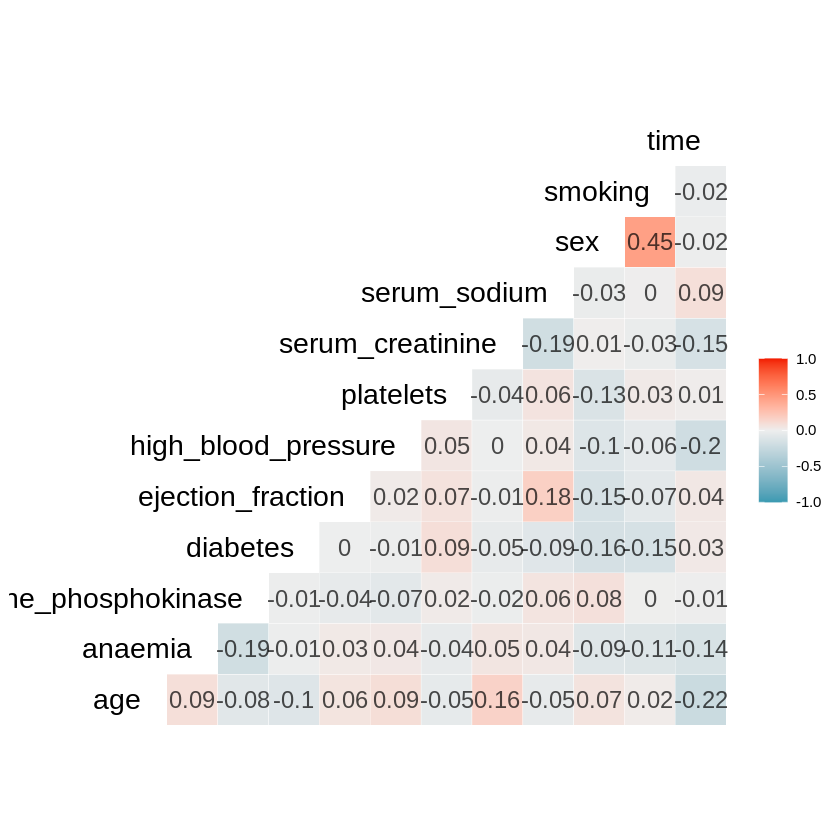

In [18]:
library(corrplot)
cov(data[1:12])
cor(data[1:12])
corr_plot<-ggcorr(data[,1:12], label=TRUE, label_size=5, label_round=2, label_alpha=0.7, hjust=1,size=6, layout.exp=2) 
corr_plot


**Univariate and multivariate Analysis of data**

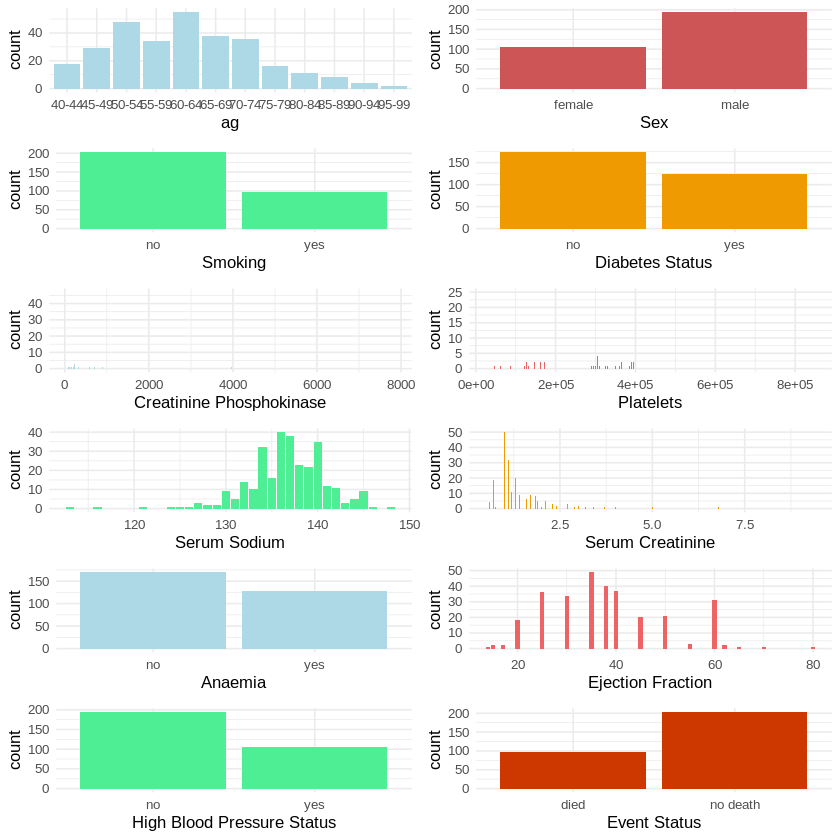

In [19]:
#Plotting distribution of data, each column values separately.
#After that frequency distribution of each category through table plots for categorical variables 
#and box plots for numerical continuous variables.
#1. age group
library(gridExtra)
library(ggplot2)
grid.arrange(
    
ggplot(df, aes(x=AgeGroup))+geom_bar(fill="lightblue")+ labs(x="ag")+ theme_minimal(base_size=10),
#p1
#2. Sex
ggplot(df, aes(x=sex))+geom_bar(fill="indianred3")+ labs(x="Sex")+ theme_minimal(base_size=10),
#p2
#3. Smoking
ggplot(df, aes(x=smoking))+geom_bar(fill="seagreen2")+ labs(x="Smoking")+ theme_minimal(base_size=10),
#p3
#4. Diabetes
ggplot(df, aes(x=diabetes))+geom_bar(fill="orange2")+
  labs(x="Diabetes Status")+ theme_minimal(base_size=10),
#p4
#5. cpk
ggplot(df, aes(x=creatinine_phosphokinase))+geom_bar(fill="lightblue")+
labs(x="Creatinine Phosphokinase")+ theme_minimal(base_size=10),
#p5
#6. Platelets
ggplot(df, aes(x=platelets))+geom_bar(fill="indianred2")+
  labs(x="Platelets")+ theme_minimal(base_size=10),
#p6
#7. serum sodium
ggplot(df, aes(x=serum_sodium))+geom_bar(fill="seagreen2")+
  labs(x="Serum Sodium") + theme_minimal(base_size=10),
#p7
#8. Serum creatinine
ggplot(df, aes(x=serum_creatinine))+geom_bar(fill="orange2")+
  labs(x="Serum Creatinine") + theme_minimal(base_size=10),
#p8

#9. anaemia 
ggplot(df, aes(x=anaemia, fill=DEATH_EVENT))+geom_bar(fill="lightblue")+ labs(x="Anaemia")+ theme_minimal(base_size=10),
#p9
#10. ejection_fraction
ggplot(df, aes(x=ejection_fraction))+geom_bar(fill="indianred2")+
  labs(x="Ejection Fraction")+ theme_minimal(base_size=10),
#p10
#11. High blood pressure
ggplot(df, aes(x=high_blood_pressure))+geom_bar(fill="seagreen2")+
  labs(x="High Blood Pressure Status")+ theme_minimal(base_size=10),
#p11
#12. Event
ggplot(df, aes(x=DEATH_EVENT))+geom_bar(fill="orangered3")+ labs(x="Event Status")+ theme_minimal(base_size=10), ncol=2
#p12
)

,female,male,Sum
died,34,62,96
no death,71,132,203
Sum,105,194,299


,female,male,Sum
died,0.1137124,0.2073579,0.3210702
no death,0.2374582,0.4414716,0.6789298
Sum,0.3511706,0.6488294,1.0000000


1.5,4.5
2.5,5.5


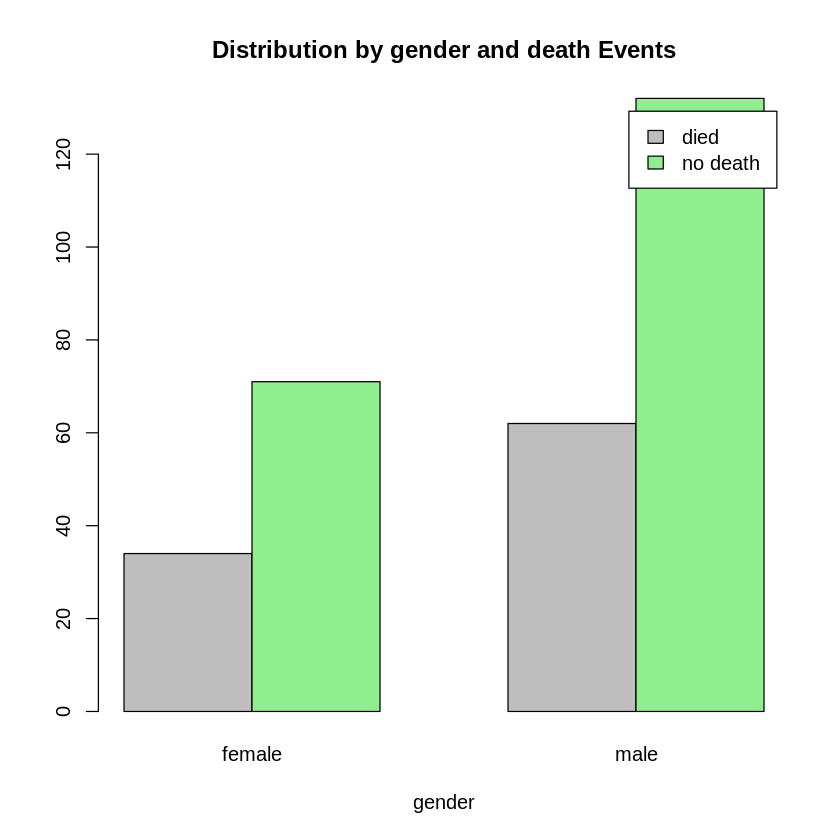

In [20]:

sex_de<-table(df$DEATH_EVENT, df$sex)
addmargins(sex_de)
addmargins(prop.table(sex_de))


b1<- barplot(sex_de, main="Distribution by gender and death Events",
  xlab="gender", col=c("gray","light green"),
  legend = rownames(sex_de), beside=TRUE)
b1


,no,yes,Sum
died,50,46,96
no death,120,83,203
Sum,170,129,299


,no,yes,Sum
died,0.1672241,0.1538462,0.3210702
no death,0.4013378,0.2775920,0.6789298
Sum,0.5685619,0.4314381,1.0000000


1.5,4.5
2.5,5.5


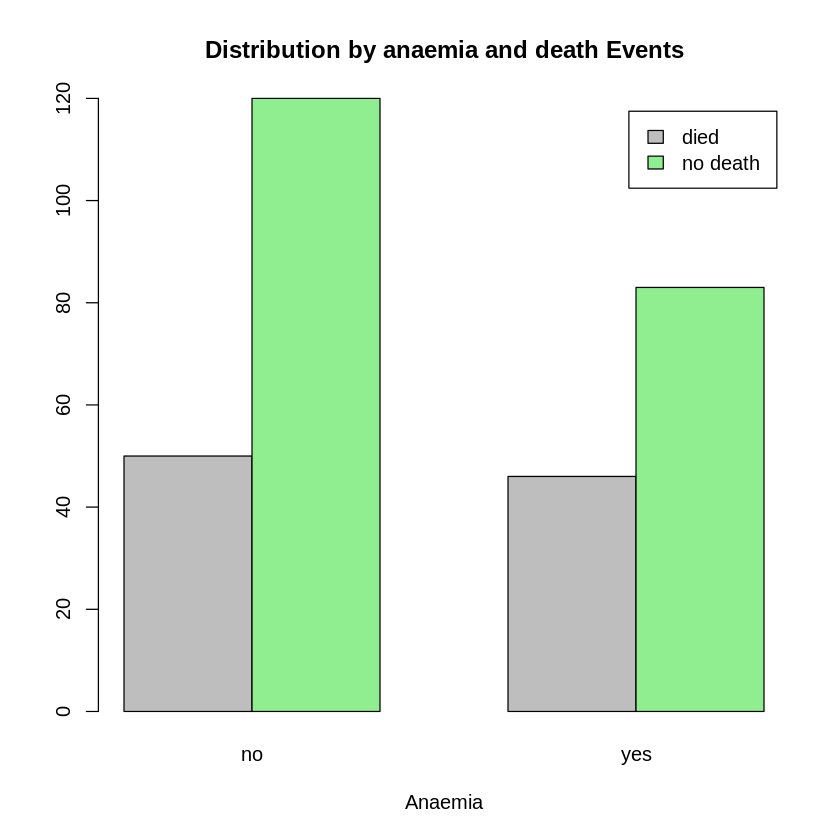

In [21]:
de_anaemia<-table(df$DEATH_EVENT, df$anaemia)
addmargins(de_anaemia)
addmargins(prop.table(de_anaemia))

b2<- barplot(de_anaemia, main="Distribution by anaemia and death Events",
  xlab="Anaemia", col=c("gray","light green"),
  legend = rownames(de_anaemia), beside=TRUE)
b2

,no,yes,Sum
died,56,40,96
no death,118,85,203
Sum,174,125,299


,no,yes,Sum
died,0.1872910,0.1337793,0.3210702
no death,0.3946488,0.2842809,0.6789298
Sum,0.5819398,0.4180602,1.0000000


1.5,4.5
2.5,5.5


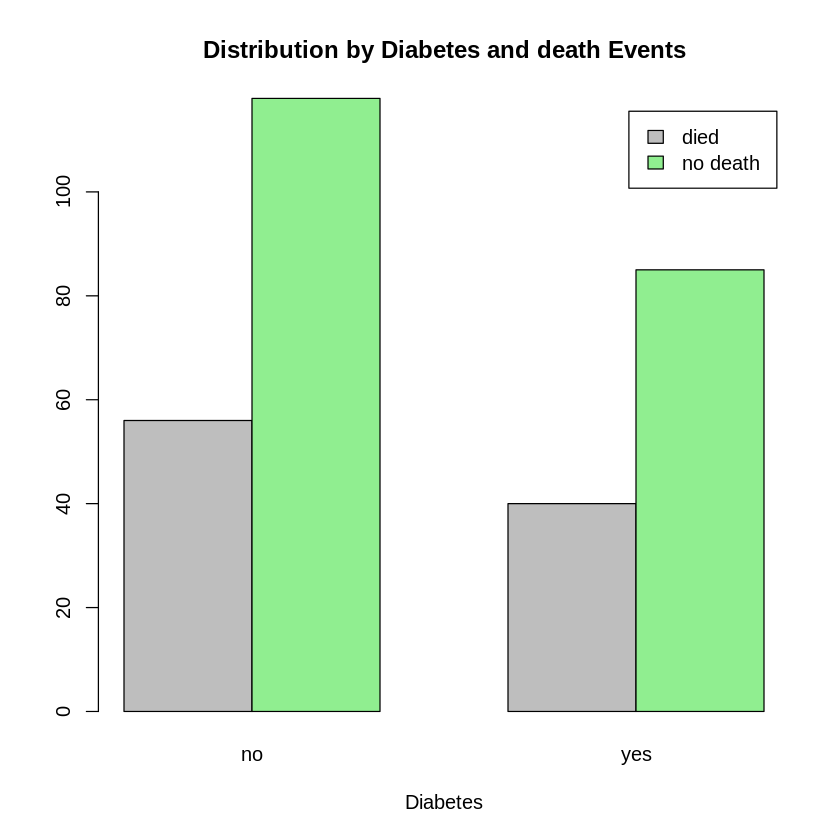

In [22]:
de_diabetes<-table(df$DEATH_EVENT, df$diabetes)
addmargins(de_diabetes)
addmargins(prop.table(de_diabetes))

b3<- barplot(de_diabetes, main="Distribution by Diabetes and death Events",
  xlab="Diabetes", col=c("gray","light green"),
  legend = rownames(de_diabetes), beside=TRUE)
b3

,no,yes,Sum
died,57,39,96
no death,137,66,203
Sum,194,105,299


,no,yes,Sum
died,0.1906355,0.1304348,0.3210702
no death,0.4581940,0.2207358,0.6789298
Sum,0.6488294,0.3511706,1.0000000


1.5,4.5
2.5,5.5


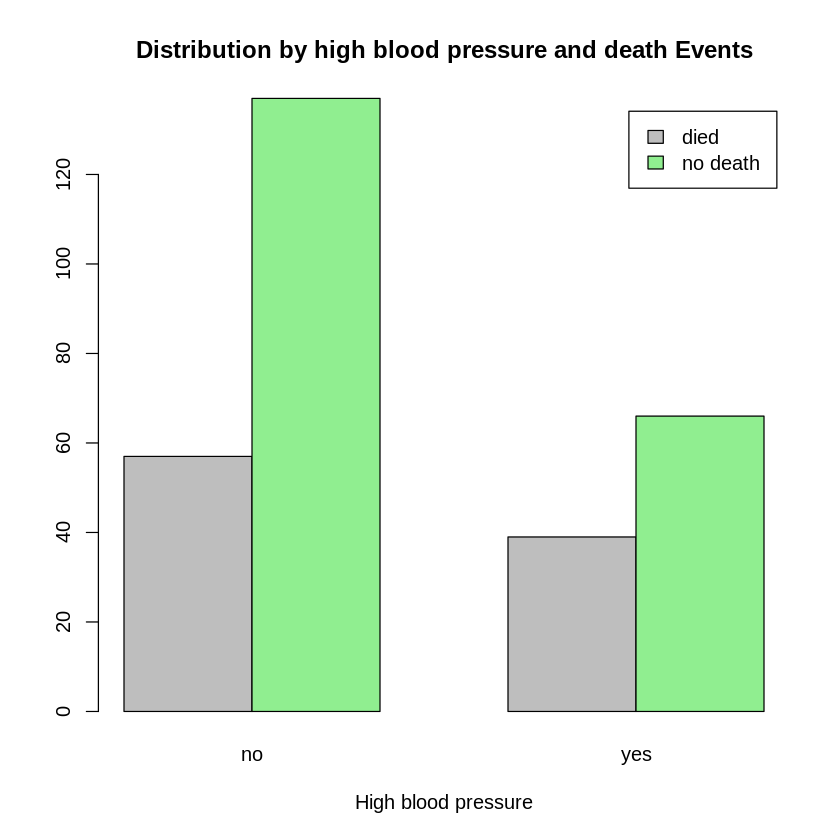

In [23]:
de_high_blood_pressure<-table(df$DEATH_EVENT, df$high_blood_pressure)
addmargins(de_high_blood_pressure)
addmargins(prop.table(de_high_blood_pressure))

b4<- barplot(de_high_blood_pressure, main="Distribution by high blood pressure and death Events",
  xlab="High blood pressure", col=c("gray","light green"),
  legend = rownames(de_high_blood_pressure), beside=TRUE)
b4

,no,yes,Sum
died,66,30,96
no death,137,66,203
Sum,203,96,299


,no,yes,Sum
died,0.2207358,0.1003344,0.3210702
no death,0.4581940,0.2207358,0.6789298
Sum,0.6789298,0.3210702,1.0000000


1.5,4.5
2.5,5.5


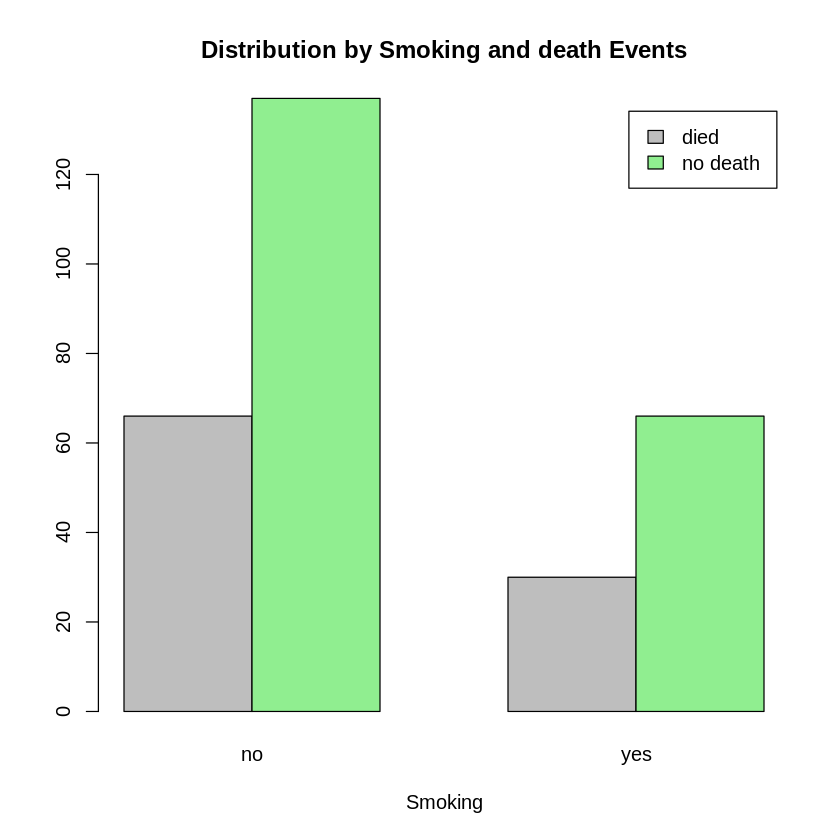

In [24]:
de_smoking<-table(df$DEATH_EVENT, df$smoking)
addmargins(de_smoking)
addmargins(prop.table(de_smoking))

b5<- barplot(de_smoking, main="Distribution by Smoking and death Events",
  xlab="Smoking", col=c("gray","light green"),
  legend = rownames(de_smoking), beside=TRUE)
b5

,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+,Sum
died,1,10,11,9,15,12,13,7,8,5,3,2,0,96
no death,17,19,37,25,40,26,23,9,3,3,1,0,0,203
Sum,18,29,48,34,55,38,36,16,11,8,4,2,0,299


,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+,Sum
died,0.003344482,0.03344482,0.0367893,0.03010033,0.05016722,0.04013378,0.04347826,0.02341137,0.02675585,0.01672241,0.010033445,0.006688963,0,0.3210702
no death,0.056856187,0.06354515,0.1237458,0.08361204,0.13377926,0.08695652,0.07692308,0.03010033,0.01003344,0.01003344,0.003344482,0.000000000,0,0.6789298
Sum,0.060200669,0.09698997,0.1605351,0.11371237,0.18394649,0.12709030,0.12040134,0.05351171,0.03678930,0.02675585,0.013377926,0.006688963,0,1.0000000


1.5,4.5,7.5,10.5,13.5,16.5,19.5,22.5,25.5,28.5,31.5,34.5,37.5
2.5,5.5,8.5,11.5,14.5,17.5,20.5,23.5,26.5,29.5,32.5,35.5,38.5


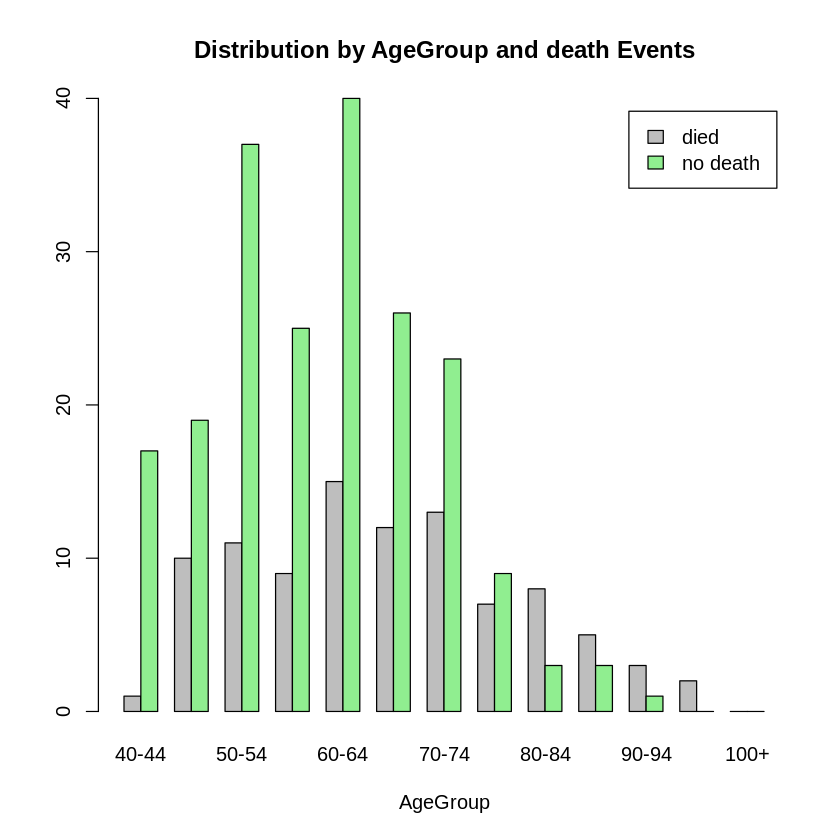

In [25]:
de_AgeGroup<-table(df$DEATH_EVENT, df$AgeGroup)
addmargins(de_AgeGroup)
addmargins(prop.table(de_AgeGroup))

b6<- barplot(de_AgeGroup, main="Distribution by AgeGroup and death Events",
  xlab="AgeGroup", col=c("gray","light green"),
  legend = rownames(de_AgeGroup), beside=TRUE)
b6

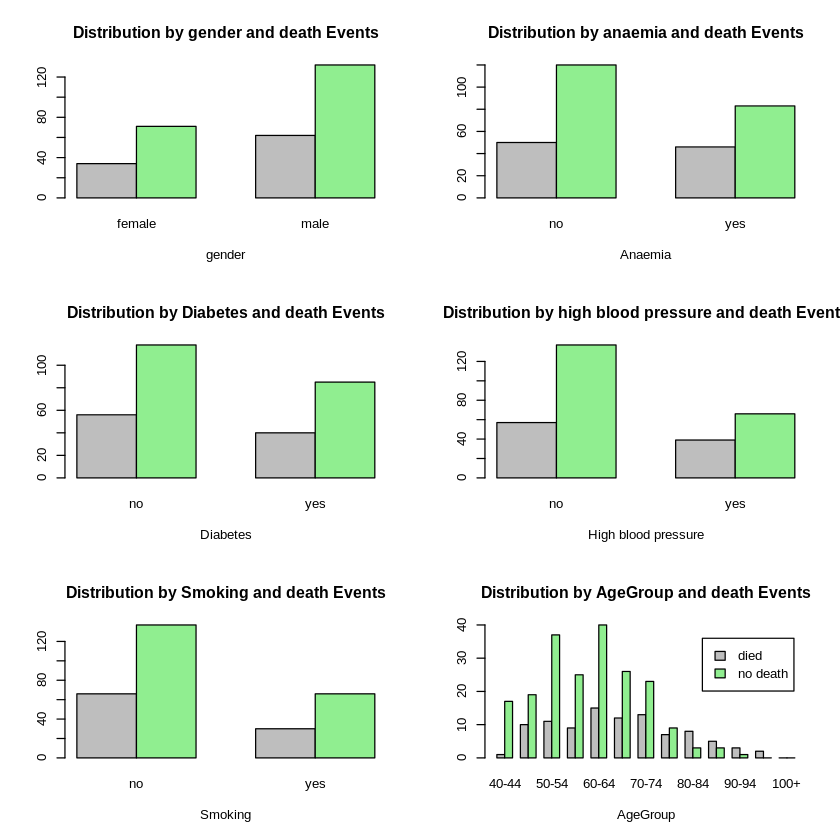

In [26]:
par(mfrow = c(3, 2))

barplot(sex_de, main="Distribution by gender and death Events",
  xlab="gender", col=c("gray","light green"),
  beside=TRUE)

barplot(de_anaemia, main="Distribution by anaemia and death Events",
  xlab="Anaemia", col=c("gray","light green"),
  beside=TRUE)

barplot(de_diabetes, main="Distribution by Diabetes and death Events",
  xlab="Diabetes", col=c("gray","light green"),
   beside=TRUE)

barplot(de_high_blood_pressure, main="Distribution by high blood pressure and death Events",
  xlab="High blood pressure", col=c("gray","light green"),
  beside=TRUE)

barplot(de_smoking, main="Distribution by Smoking and death Events",
  xlab="Smoking", col=c("gray","light green"),
  beside=TRUE)

 barplot(de_AgeGroup, main="Distribution by AgeGroup and death Events",
  xlab="AgeGroup", col=c("gray","light green"),
  legend = rownames(de_AgeGroup), beside=TRUE)

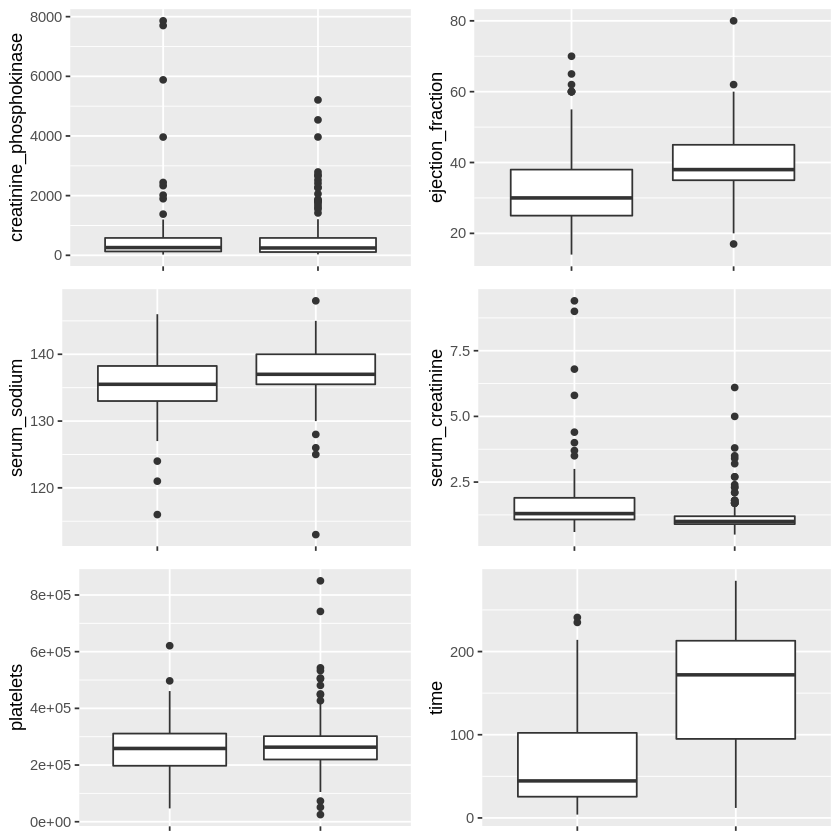

In [31]:
newnames=c('creatinine_phosphokinase','ejection_fraction','serum_sodium','serum_creatinine','platelets','time')
p=list()
for(i in 1:length(newnames)){
  p[[i]] <- ggplot(df, aes_string(y=newnames[i],x="DEATH_EVENT")) + 
              geom_boxplot() + 
              theme(axis.text.x=element_blank(),
                    axis.title.x=element_blank()) 
  }

library(gridExtra)
grid.arrange(p[[1]],p[[2]],p[[3]],p[[4]],p[[5]],p[[6]],
    ncol=2) 

## 3. 4. 5. ... The Rest..

Similar to above, have **sections** for every major step in your analysis.  PCA, FA, Clustering, etc. running your models, hypotheses, explaining what you have learned, presenting results with visualizations, and the conclusion should have their own sections. 


**Multivariate Modeling using Manova to find the important numeric features**

In [70]:
m.model<-manova(cbind(age,creatinine_phosphokinase,ejection_fraction,serum_sodium,serum_creatinine,platelets,time)~DEATH_EVENT, data=data)

In [71]:
summary(m.model,test="Hotelling-Lawley")

             Df Hotelling-Lawley approx F num Df den Df    Pr(>F)    
DEATH_EVENT   1          0.69965   29.086      7    291 < 2.2e-16 ***
Residuals   297                                                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**The p value associated with the Hotelling-Lawley statistics is very small.
It indicates a strong evidence that the mean vectors of the variables are not the same for both dead patients and survived patients.**

In [72]:
t(tapply(data$creatinine_phosphokinase, data$DEATH_EVENT, mean))

0,1
540.0542,670.1979


In [73]:
t(tapply(data$age, data$DEATH_EVENT, mean))

0,1
58.76191,65.21528


In [35]:
t(tapply(data$ejection_fraction, data$DEATH_EVENT, mean))

0,1
40.26601,33.46875


In [36]:
t(tapply(data$serum_sodium, data$DEATH_EVENT, mean))

0,1
137.2167,135.375


In [37]:
t(tapply(data$serum_creatinine, data$DEATH_EVENT, mean))

0,1
1.184877,1.835833


In [38]:
t(tapply(data$platelets, data$DEATH_EVENT, mean))

0,1
266657.5,256381


In [39]:
t(tapply(data$time, data$DEATH_EVENT, mean))

0,1
158.3399,70.88542


**The features like age, creatinine_phosphokinase, serum_creatinine, platelets, ejection_fraction and time are significantly different for survivors than the mortals.**

**Fitting a logistic regression model to predict the chances of surviving after a heart failure with the given features.**

In [40]:
table(data$DEATH_EVENT)


  0   1 
203  96 

**Splitting the data into train and test sets**

In [41]:
library(caTools)
require(ISLR)
set.seed(100) # set.seed() will help us to reproduce the results.
split = sample.split(data$DEATH_EVENT,SplitRatio=0.7)

hfs_train = subset(data, split==TRUE)
hfs_test = subset(data, split==FALSE)

nrow(hfs_train)
nrow(hfs_test)

Loading required package: ISLR



[1] 209

[1] 90

In [42]:
names(data)

[1] "age"                      "anaemia"                 
 [3] "creatinine_phosphokinase" "diabetes"                
 [5] "ejection_fraction"        "high_blood_pressure"     
 [7] "platelets"                "serum_creatinine"        
 [9] "serum_sodium"             "sex"                     
[11] "smoking"                  "time"                    
[13] "DEATH_EVENT"

In [43]:
heart_failure_survive = glm(DEATH_EVENT~ age + anaemia + creatinine_phosphokinase + diabetes + ejection_fraction + high_blood_pressure + platelets + serum_creatinine + serum_sodium + sex + smoking + time , data = hfs_train, family = binomial)

In [44]:
summary(heart_failure_survive)


Call:
glm(formula = DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase + 
    diabetes + ejection_fraction + high_blood_pressure + platelets + 
    serum_creatinine + serum_sodium + sex + smoking + time, family = binomial, 
    data = hfs_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1193  -0.5761  -0.1853   0.4961   2.6889  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.990e+01  7.855e+00   2.534 0.011278 *  
age                       4.221e-02  2.004e-02   2.106 0.035212 *  
anaemia                  -2.800e-01  4.589e-01  -0.610 0.541836    
creatinine_phosphokinase  6.384e-05  1.788e-04   0.357 0.721107    
diabetes                 -1.035e-01  4.401e-01  -0.235 0.814047    
ejection_fraction        -8.177e-02  2.116e-02  -3.864 0.000112 ***
high_blood_pressure      -2.289e-01  4.560e-01  -0.502 0.615662    
platelets                -3.101e-07  2.159e-06  -0.144 0.885766    
serum_cr

**Finding accuracy of the above model**

In [45]:
probs = predict(heart_failure_survive, type = 'response', newdata=hfs_test)

pred <- ifelse(probs > 0.5, 1, 0)

misclassificationError<-mean(pred!=hfs_test$DEATH_EVENT)
print(paste("Accuracy",1-misclassificationError))

[1] "Accuracy 0.777777777777778"


In [46]:
table(data$DEATH_EVENT)



  0   1 
203  96 

In [47]:
print(paste('baseline accuracy =', 203/(203+96)))

[1] "baseline accuracy = 0.678929765886288"


**The accuracy of the model for unseen data is about 78% where as baseline model has n accuracy of 67%.**

In [48]:
table(hfs_test$DEATH_EVENT,pred>0.5)

   
    FALSE TRUE
  0    54    7
  1    13   16

**Finding the sensitivity and specificity using the two way table results**

In [49]:
print(paste('sens=',16/(16+13)))
print(paste('spec=',54/(54+7)))

[1] "sens= 0.551724137931034"
[1] "spec= 0.885245901639344"


**ROC curve for the model**

[1] 0.8643301

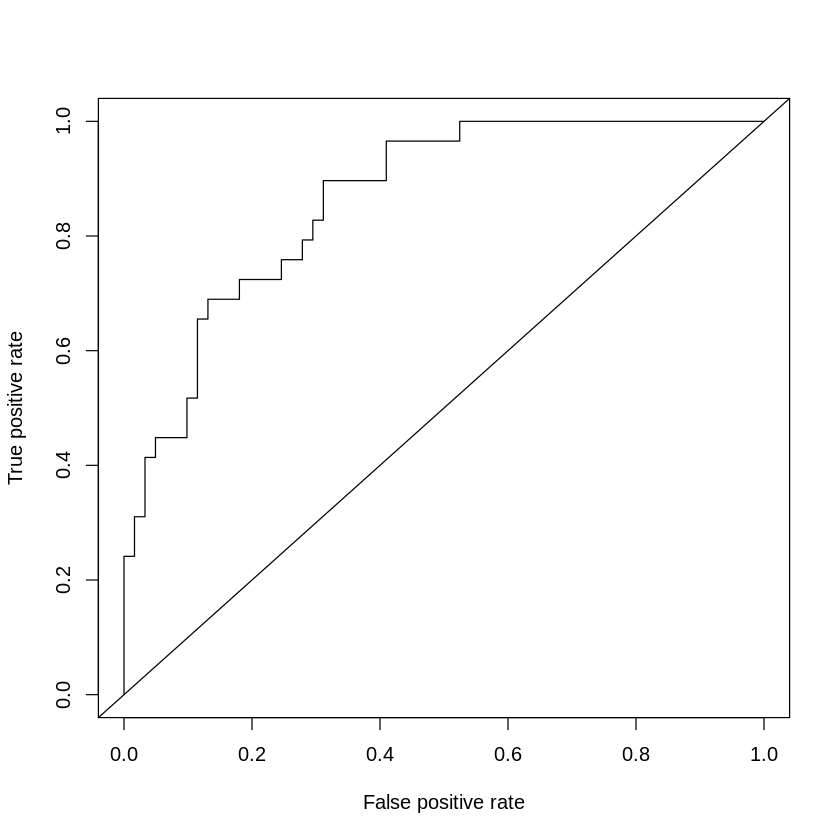

In [50]:
library(ROCR)
ROCR_predictions = prediction(probs,hfs_test$DEATH_EVENT)
perf<-performance(ROCR_predictions,"tpr","fpr")

plot(perf, colorsize = TRUE)
abline(0,1)
as.numeric(performance(ROCR_predictions,"auc")@y.values)

**Decision Tree Model**

In [51]:
set.seed(1)

n = nrow(data)

trainIndex = sample(1:n, size = round(0.7*n), replace=FALSE)

train = data[trainIndex ,]
test = data[-trainIndex ,]
test_X <- select(test, 'age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time')
dim(train)
dim(test)
names(data)
test_X

[1] 209  13

[1] 90 13

[1] "age"                      "anaemia"                 
 [3] "creatinine_phosphokinase" "diabetes"                
 [5] "ejection_fraction"        "high_blood_pressure"     
 [7] "platelets"                "serum_creatinine"        
 [9] "serum_sodium"             "sex"                     
[11] "smoking"                  "time"                    
[13] "DEATH_EVENT"

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
3,65,0,146,0,20,0,162000,1.30,129,1,1,7
5,65,1,160,1,20,0,327000,2.70,116,0,0,8
7,75,1,246,0,15,0,127000,1.20,137,1,0,10
8,60,1,315,1,60,0,454000,1.10,131,1,1,10
10,80,1,123,0,35,1,388000,9.40,133,1,1,10
11,75,1,81,0,38,1,368000,4.00,131,1,1,10
12,62,0,231,0,25,1,253000,0.90,140,1,1,10
18,45,0,582,0,14,0,166000,0.80,127,1,0,14
21,65,1,52,0,25,1,276000,1.30,137,0,0,16


In [52]:
frmla<- as.factor(DEATH_EVENT) ~ age + anaemia + creatinine_phosphokinase + diabetes + ejection_fraction + high_blood_pressure + platelets + serum_creatinine + serum_sodium + sex + smoking + time

In [53]:
library(tree)

In [54]:
tr <- tree(frmla, data = train)

In [55]:
summary(tr)


Classification tree:
tree(formula = frmla, data = train)
Variables actually used in tree construction:
[1] "time"                     "platelets"               
[3] "creatinine_phosphokinase" "ejection_fraction"       
[5] "age"                      "serum_creatinine"        
Number of terminal nodes:  18 
Residual mean deviance:  0.3502 = 66.89 / 191 
Misclassification error rate: 0.08134 = 17 / 209 

In [56]:
library(tree)
test$pred<- predict(tr, test_X, type = 'class')


In [57]:
miss <- test[test$DEATH_EVENT != test$pred,]

In [58]:
misclassificationError<-mean(test$DEATH_EVENT != test$pred)
print(paste("Accuracy",1-misclassificationError))

[1] "Accuracy 0.755555555555556"


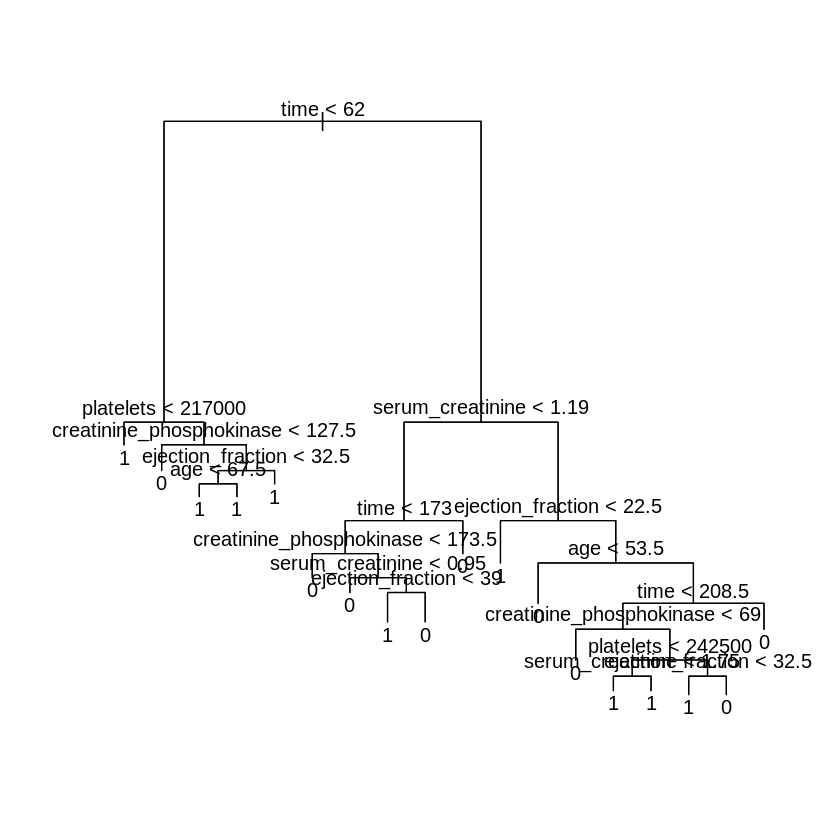

In [59]:
plot(tr)
text(tr)

If we use only the important features for developing the model, let's see if the accuracy improves.


In [60]:
frmla1<- as.factor(DEATH_EVENT) ~ age + creatinine_phosphokinase + diabetes + ejection_fraction + platelets + serum_creatinine + time

In [61]:
tr1 <- tree(frmla1, data = train)

In [62]:
summary(tr1)
test$pred1<- predict(tr1, test_X, type = 'class')
misclassificationError1<-mean(test$DEATH_EVENT != test$pred1)
print(paste("Accuracy",1-misclassificationError1))


Classification tree:
tree(formula = frmla1, data = train)
Variables actually used in tree construction:
[1] "time"                     "platelets"               
[3] "creatinine_phosphokinase" "ejection_fraction"       
[5] "age"                      "serum_creatinine"        
Number of terminal nodes:  18 
Residual mean deviance:  0.3502 = 66.89 / 191 
Misclassification error rate: 0.08134 = 17 / 209 

[1] "Accuracy 0.755555555555556"


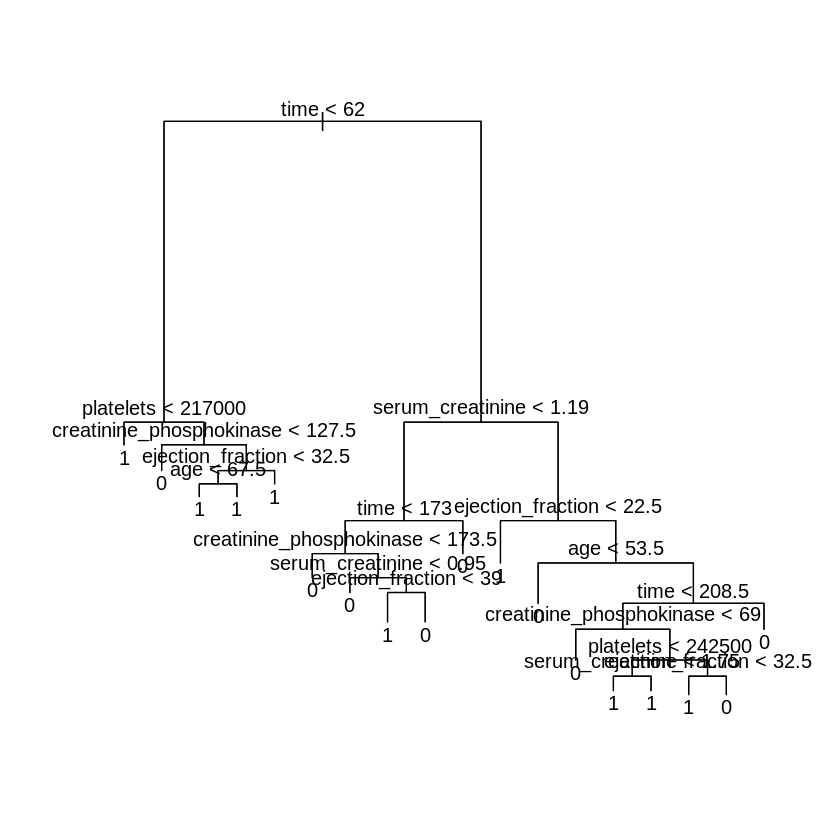

In [63]:
plot(tr)
text(tr)

In [64]:
heart_failure_survive1 = glm(DEATH_EVENT~ age + creatinine_phosphokinase + ejection_fraction + platelets + serum_creatinine + time , data = hfs_train, family = binomial)

In [65]:
summary(heart_failure_survive1)


Call:
glm(formula = DEATH_EVENT ~ age + creatinine_phosphokinase + 
    ejection_fraction + platelets + serum_creatinine + time, 
    family = binomial, data = hfs_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1548  -0.5746  -0.2245   0.5252   2.8745  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               9.274e-01  1.403e+00   0.661   0.5087    
age                       4.095e-02  1.903e-02   2.152   0.0314 *  
creatinine_phosphokinase  8.951e-05  1.629e-04   0.550   0.5826    
ejection_fraction        -7.654e-02  1.966e-02  -3.892 9.92e-05 ***
platelets                -9.860e-07  2.022e-06  -0.488   0.6258    
serum_creatinine          7.949e-01  3.175e-01   2.504   0.0123 *  
time                     -2.117e-02  3.499e-03  -6.050 1.45e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 262.21  on

In [66]:
probs1 = predict(heart_failure_survive1, type = 'response', newdata=hfs_test)

pred1 <- ifelse(probs1 > 0.5, 1, 0)

misclassificationError1<-mean(pred1!=hfs_test$DEATH_EVENT)
print(paste("Accuracy",1-misclassificationError1))

[1] "Accuracy 0.822222222222222"


The accuracy of the model improved by 0.17 

**The survival of a patient can be predicted 82% accurately where the baseline model has n accuracy of 67%. **

In [67]:
table(hfs_test$DEATH_EVENT,pred1>0.5)

   
    FALSE TRUE
  0    56    5
  1    11   18

In [68]:
print(paste('sens=',18/(18+11)))
print(paste('spec=',56/(56+5)))


[1] "sens= 0.620689655172414"
[1] "spec= 0.918032786885246"


[1] 0.8892029

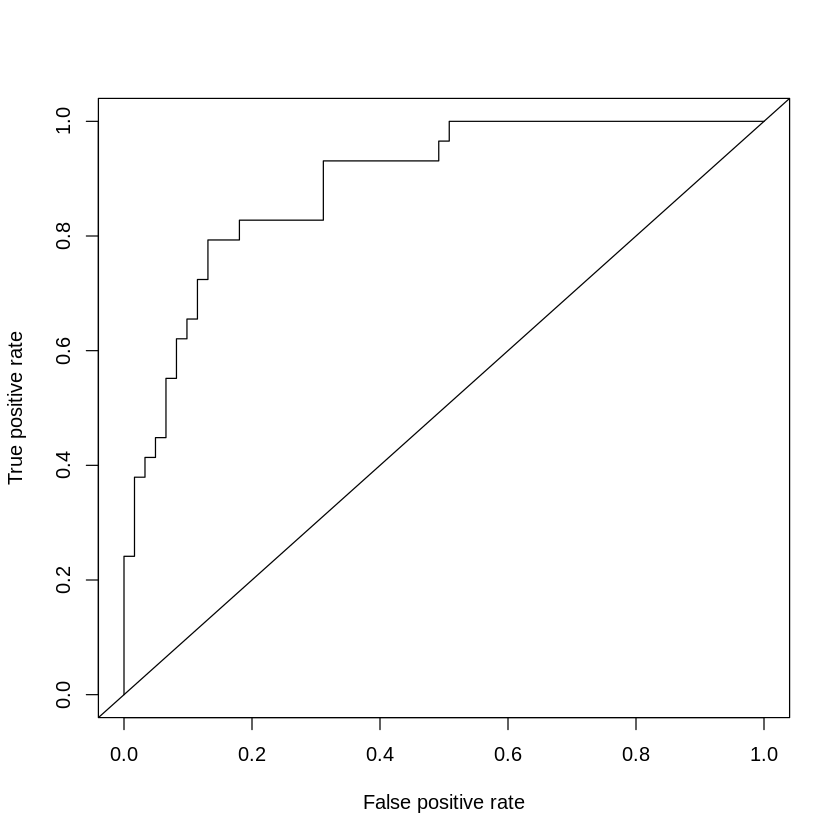

In [69]:
library(ROCR)
ROCR_predictions1 = prediction(probs1,hfs_test$DEATH_EVENT)
perf1<-performance(ROCR_predictions1,"tpr","fpr")

plot(perf1, colorsize = TRUE)
abline(0,1)
as.numeric(performance(ROCR_predictions1,"auc")@y.values)


**Report:**

In this study, the heart failure clinical record dataset has been collected from Machine Learning Repository. (https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#)
The dataset is a cleaned one, there were no null values. An exploratory data analysis through correlation plots, and univariate and multivariate analysis of data, gives a clear picture that, no two variables are positively or negatively correlated. From the box plots, we can have a clear idea that time and ejection fraction are significant factors for predicting the survival of patients having heart failure.
From the Monova and the increase in accuracy of the classification models, we can confirm that along with that, age, creatinine phosphokinase, platelets, and serum creatinine features play a significant role too. The latest logistic regression model predicts the survival of patients with an accuracy of 0.82  for unseen data, having a sensitivity of 0.62 and a specificity of 0.91, and a baseline accuracy of 0.67. However, The decision tree model predicts with an accuracy of 0.75 
